In [1]:
# importing libraries
import cartopy.feature as cf
import cartopy.crs as ccrs
import xarray as xr
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import geopandas as gpd


In [73]:
# in this first step the analysis is done only for one frame of one file
filepath = './data/ndvi_sh_201706.nc'


In [74]:
# open the file to check the content
xr.open_dataset(filepath)


<xarray.Dataset> Size: 314MB
Dimensions:  (t: 5, x: 4521, y: 3470)
Coordinates:
  * t        (t) datetime64[ns] 40B 2017-06-16 2017-06-19 ... 2017-06-29
  * x        (x) float64 36kB 4.473e+05 4.473e+05 ... 4.925e+05 4.925e+05
  * y        (y) float64 28kB 5.299e+06 5.299e+06 ... 5.264e+06 5.264e+06
Data variables:
    crs      |S1 1B ...
    var      (t, y, x) float32 314MB ...
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform

In [75]:
# save the data and rename the variables
ndvi = xr.open_dataset(filepath).rename(dict(x='lon', y='lat', t='time', var='NDVI')).NDVI
ndvi.attrs = {'long_name': 'NDVI', 'units': '-'}


In [76]:
# loading shapefile for Switzerland
# the data was loaded from https://www.swisstopo.admin.ch/de/landschaftsmodell-swissboundaries3d
# QGis was used to export the Shapefile for Schaffhausen in the WGS84 coordinate system

sh_shape = gpd.read_file('./shapefileSH/shape_SH.shp')


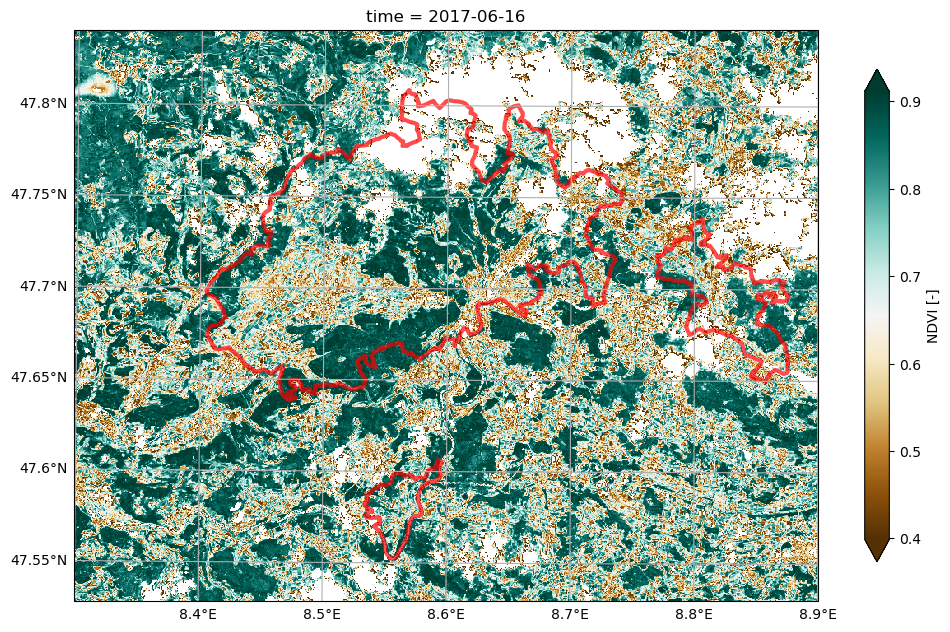

In [77]:
# plot data for a single frame
frame = 0

# create NDVI plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(projection=ccrs.UTM(zone='32')))
ndvi.isel(time=frame).coarsen(lat=5, lon=5, boundary='trim').mean().plot(robust=True, ax=ax, cmap='BrBG', cbar_kwargs={'shrink': 0.8})
# ndvi.isel(time=frame).plot(robust=True, ax=ax, cmap='BrBG', cbar_kwargs={'shrink': 0.8})

# Adding boundary lines
sh_shape = sh_shape.to_crs(ccrs.UTM(zone='32').proj4_init)
ax.add_geometries(sh_shape.geometry, ccrs.UTM(zone='32'), edgecolor='red', facecolor='none', alpha=0.7, linewidth=3)

# Set up gridlines and format them to display longitude and latitude labels
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.savefig("./LaTeX/ndvi_plot.pdf", bbox_inches='tight')
plt.show()